<a href="https://colab.research.google.com/github/juanC0627/aLATAM/blob/main/DESAFIOS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/CLASES DE aLATAM/inmuebles_bogota.csv")

In [3]:
columnas = { "baños" : "banos" , "Área" : "Area"}
inmuebles = inmuebles.rename(columns=columnas)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [9]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles["Moneda"] = valor[0]
inmuebles["Precio"] = valor[1]

In [10]:
inmuebles["Precio"] = inmuebles["Precio"].str.replace(".","", regex=True) 

In [11]:
inmuebles["Precio_Millon"] = inmuebles.Precio.astype("float")/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


DESAFIOS DE CLASE # 2

1.estudiar el histograma de valores, seleccionar 3 tipos de inmuebles (refinar el gráfico, títulos, colores, conclusión de la informacion
2. Precio de m2 por barrio y hacer gráfico más adecuado para esta nueva variable

In [5]:
#1

<ipython-input-36-4e69c9366d6f>:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  casas_apto_fincas = sns.histplot(data=casas_apto_fincas, x= "Precio_Millon", kde=True, hue="Tipo", palette=sns.color_palette("bright"))


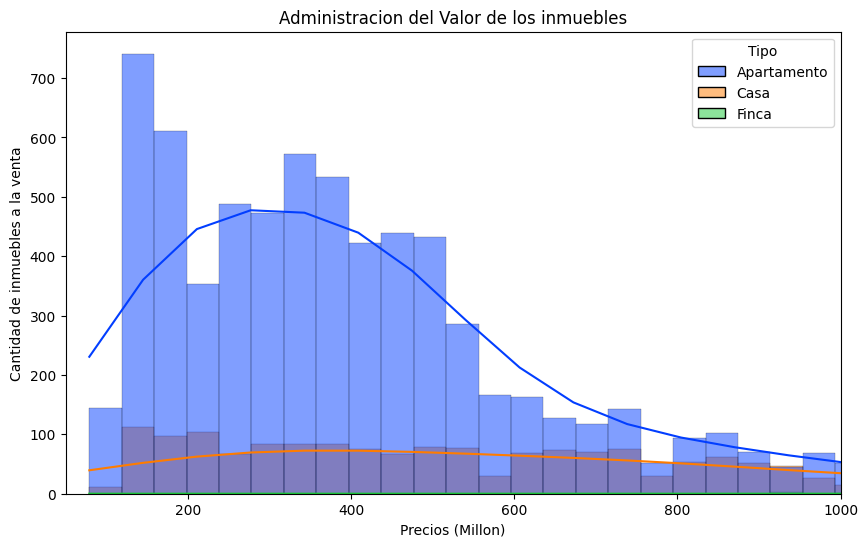

In [36]:
casas_apto_fincas = inmuebles.loc[(inmuebles.Tipo == "Casa") | (inmuebles.Tipo == "Apartamento") | (inmuebles.Tipo == "Finca")]
plt.figure(figsize=(10,6))
casas_apto_fincas = sns.histplot(data=casas_apto_fincas, x= "Precio_Millon", kde=True, hue="Tipo", palette=sns.color_palette("bright"))
casas_apto_fincas.set_title("Administracion del Valor de los inmuebles")
casas_apto_fincas.set(xlabel = "Precios (Millon)" , ylabel = "Cantidad de inmuebles a la venta")
plt.xlim((50,1000))

plt.show()

In [34]:
# 2

<ipython-input-63-a98c69e5a45f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Precio_M2 = inmuebles.loc[inmuebles.Barrio == "Barrio"] [inmuebles.Area == "Area"]
<ipython-input-63-a98c69e5a45f>:3: UserWarning: 
The palette list has fewer values (10) than needed (149) and will cycle, which may produce an uninterpretable plot.
  Precio_M2 = sns.histplot(data=inmuebles, x= "Precio_Millon", kde=True, hue="Barrio", palette=sns.color_palette("bright"))
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


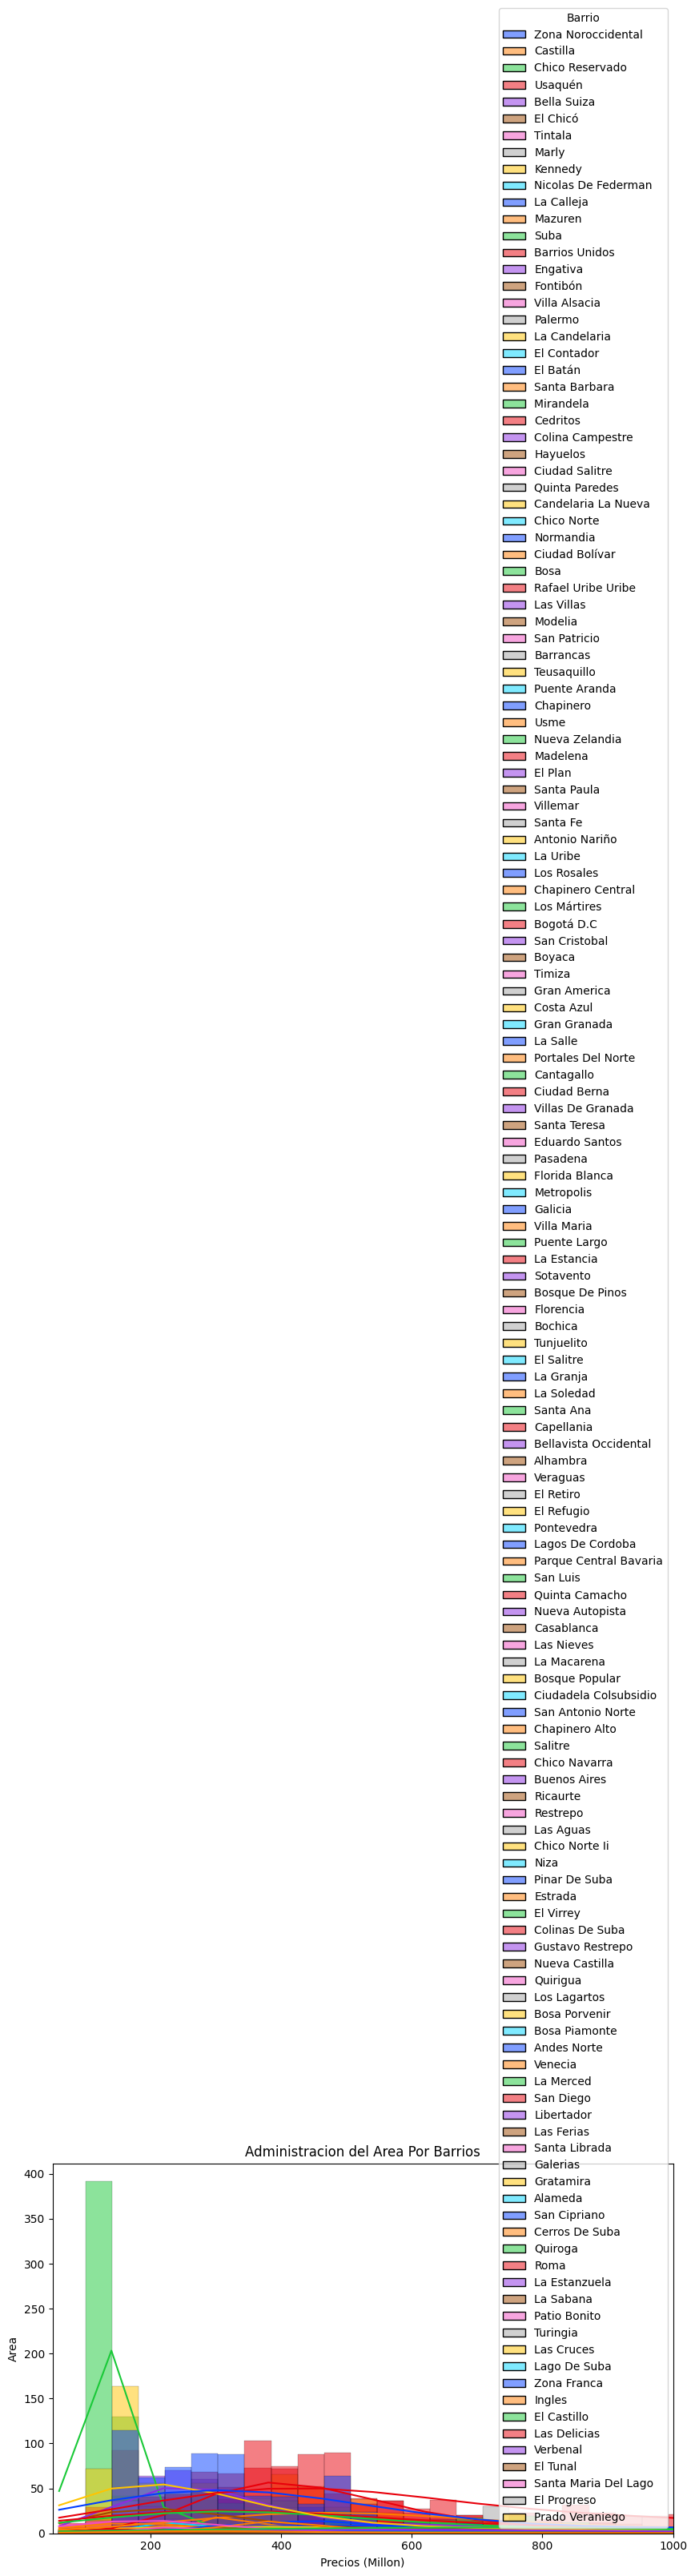

In [63]:
Precio_M2 = inmuebles.loc[inmuebles.Barrio == "Barrio"] [inmuebles.Area == "Area"] 
plt.figure(figsize=(10,6))
Precio_M2 = sns.histplot(data=inmuebles, x= "Precio_Millon", kde=True, hue="Barrio", palette=sns.color_palette("bright"))
Precio_M2.set_title("Administracion del Area Por Barrios")
Precio_M2.set(xlabel = "Precios (Millon)" , ylabel = "Area")
plt.xlim((50,1000))

plt.show()